## 🛳️ Titanic Dataset - Exploratory Data Analysis (EDA)

#### 📌 1. Introduction

The Titanic dataset provides information on the passengers of the ill-fated Titanic ship. The goal of this EDA is to explore the structure of the data, uncover underlying patterns, and generate insights that may contribute to further predictive modeling tasks.

#### 📚 2. Importing Required Libraries

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings as fw
fw('ignore')

# Set plot style
sns.set(style="whitegrid")

#### 📥 3. Load the Titanic Dataset

In [52]:
# Load dataset from seaborn
df = sns.load_dataset('titanic')

# Display first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 🧠 4. Basic Information About the Dataset

In [53]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Info summary
df.info()

Dataset shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 🔍 5. Descriptive Statistics

In [54]:
# Summary statistics of numerical features
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
# Summary statistics of categorical features
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


#### 🧼 6. Missing Values Analysis

In [56]:
# Count of missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

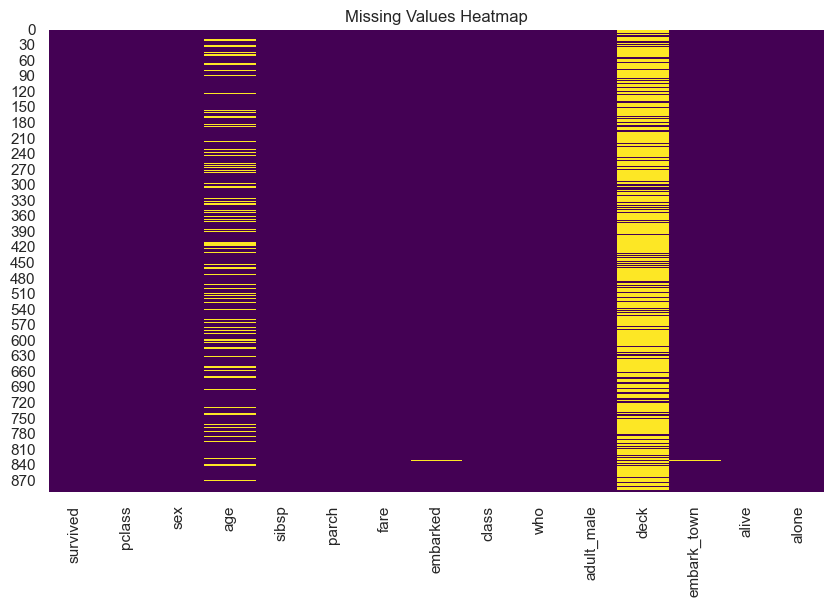

In [57]:
# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### 🧭 7. Univariate Analysis

##### 🎯 Target Variable: survived

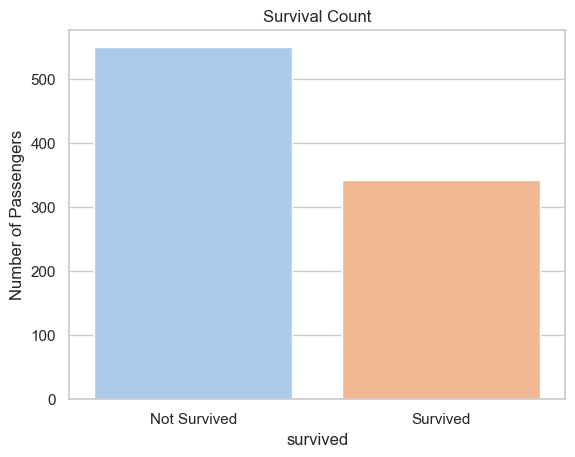

In [58]:
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel('Number of Passengers')
plt.show()

##### 👤 Passenger Class Distribution

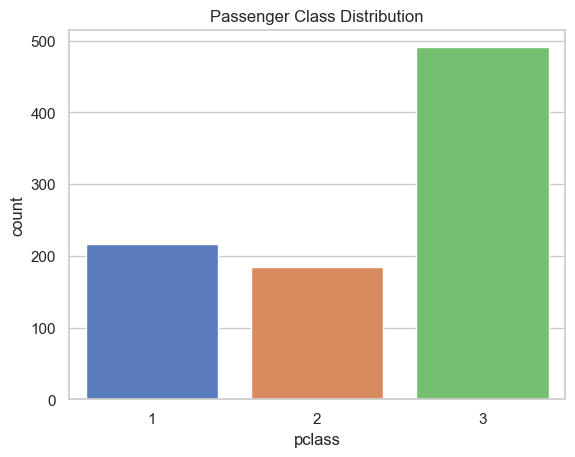

In [59]:
sns.countplot(x='pclass', data=df, palette='muted')
plt.title('Passenger Class Distribution')
plt.show()

##### ⚓ Gender Distribution

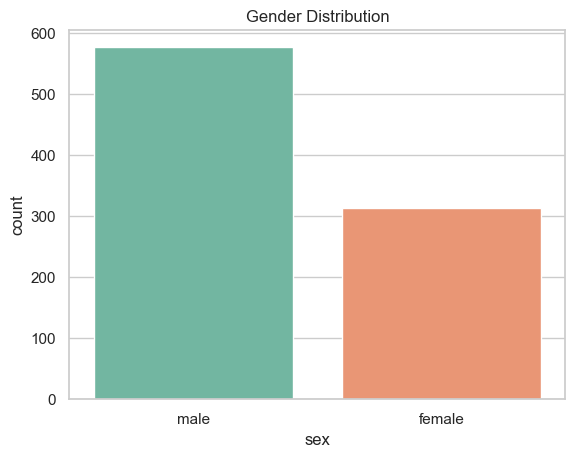

In [60]:
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

##### 🧒 Age Distribution

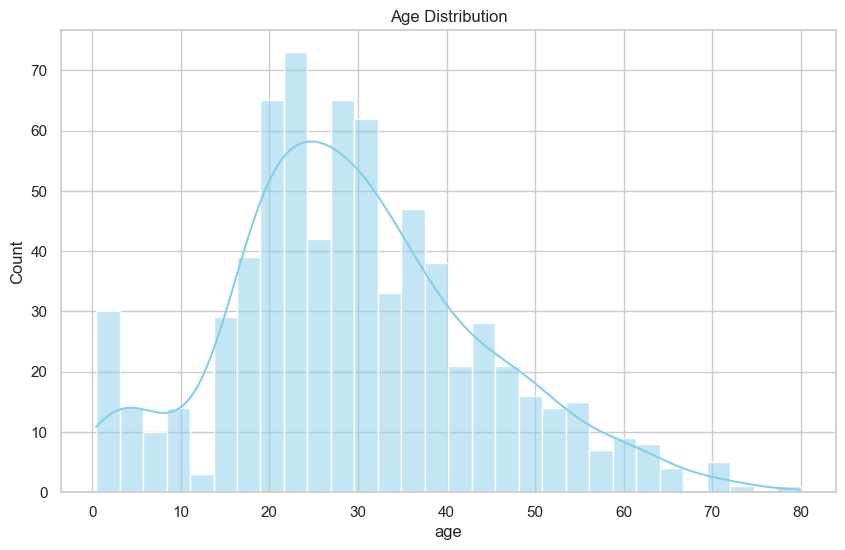

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

#### 🔁 8. Bivariate Analysis

##### 💀 Survival Rate by Gender

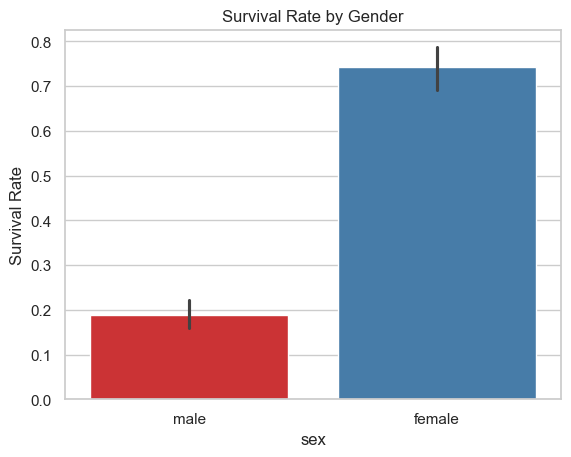

In [62]:
sns.barplot(x='sex', y='survived', data=df, palette='Set1')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

##### 💼 Survival Rate by Class

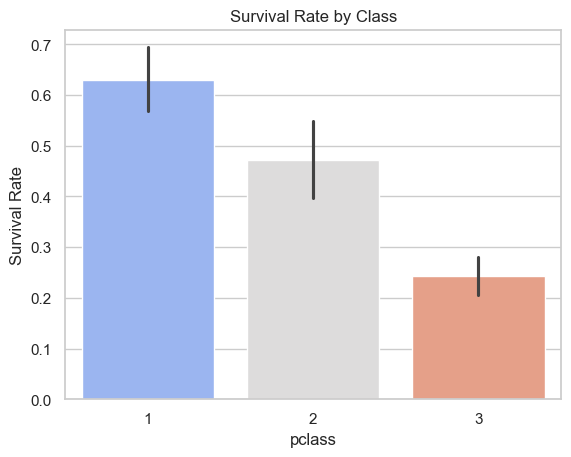

In [63]:
sns.barplot(x='pclass', y='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.show()

##### 🧍‍♂️ Survival by Age

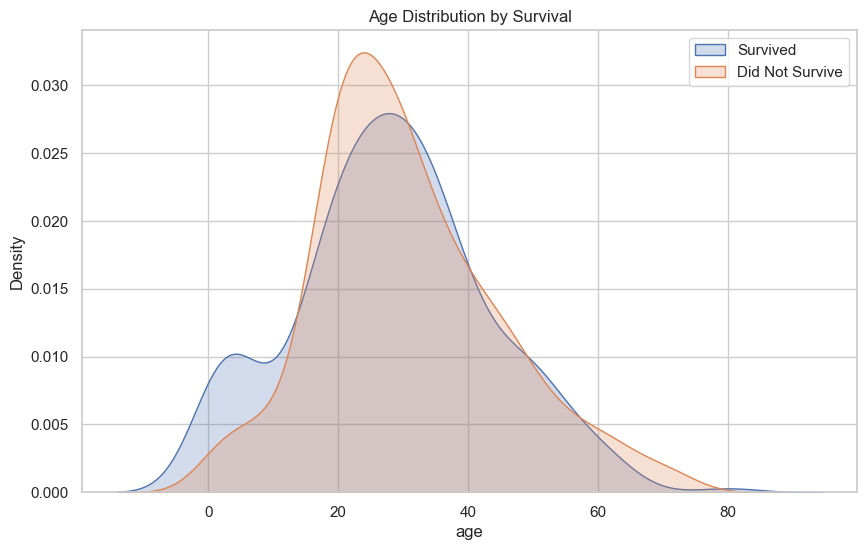

In [82]:
plt.figure(figsize=(10,6))

# KDE for passengers who survived
sns.kdeplot(data=df[df['survived']==1]['age'], label='Survived', shade=True)

# KDE for passengers who did not survive
sns.kdeplot(data=df[df['survived']==0]['age'], label='Did Not Survive', shade=True)

# Title and legend
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

#### 🧩 9. Correlation Analysis

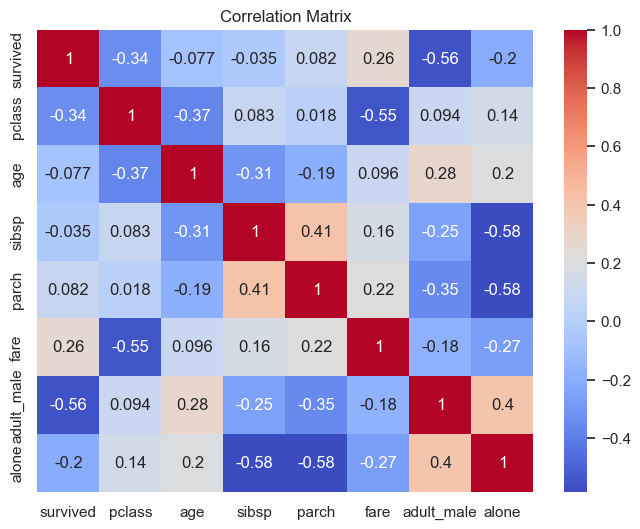

In [83]:
# Compute correlation matrix for numerical columns
corr = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(8,6))

# Plot the heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title
plt.title("Correlation Matrix")
plt.show()

#### 🧠 10. Feature Relationships (Advanced Pairplot)

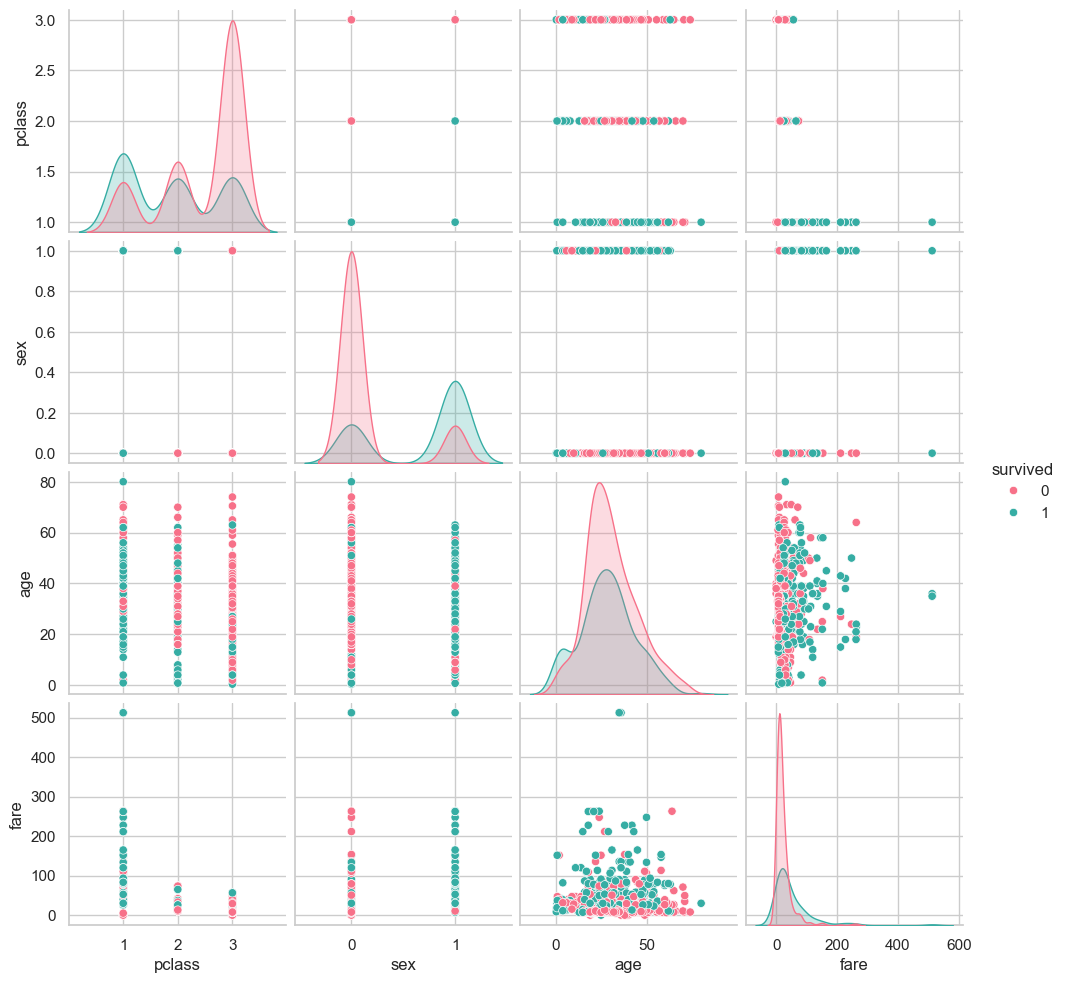

In [74]:
# Select relevant features and drop missing values
features = ['survived', 'pclass', 'sex', 'age', 'fare']
df_pair = df[features].dropna()

# Convert 'sex' column to numeric for visualization
df_pair['sex'] = df_pair['sex'].map({'male': 0, 'female': 1})

# Create pairplot with hue based on survival
sns.pairplot(df_pair, hue='survived', palette='husl')
plt.show()

#### 🧽 11. Data Cleaning (Optional for Modeling)

In [67]:
# Drop columns with high missing values or less relevance
df_cleaned = df.drop(columns=['deck', 'embark_town', 'alive'])

# Fill missing age with median
df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())

# Fill embark with mode
df_cleaned['embarked'] = df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0])

#### ✅ 12. Final Thoughts
	•	Female passengers had a significantly higher survival rate than males.
	•	Passengers in first class had a better chance of survival.
	•	Age had a subtle but meaningful effect on survival.
	•	Many features like gender, class, and fare can be strong indicators for modeling.

This EDA gives a solid foundation for building classification models and improving your understanding of the Titanic dataset.